In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [2]:
data = pd.read_csv('CreditPrediction.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [4]:
data = data.drop(columns=['Unnamed: 19','CLIENTNUM'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Gender                    9968 non-null   object 
 2   Dependent_count           10167 non-null  int64  
 3   Education_Level           10167 non-null  object 
 4   Marital_Status            8217 non-null   object 
 5   Income_Category           10167 non-null  object 
 6   Card_Category             8243 non-null   object 
 7   Months_on_book            9944 non-null   float64
 8   Total_Relationship_Count  10147 non-null  float64
 9   Months_Inactive_12_mon    10167 non-null  int64  
 10  Contacts_Count_12_mon     10167 non-null  int64  
 11  Credit_Limit              10167 non-null  float64
 12  Total_Revolving_Bal       10167 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 14  Total_

In [6]:
data['Customer_Age'].unique()

array([ 45.        ,  49.        ,  51.        ,  40.        ,
        44.        ,  32.        ,  37.        ,  48.        ,
        42.        ,  65.        ,  56.        ,  35.        ,
        57.        ,  41.        ,  61.        ,  47.        ,
        62.        ,  54.        ,  59.        ,  63.        ,
        53.        ,  58.        ,  55.        ,  66.        ,
        50.        ,  38.        ,  46.        ,  52.        ,
        39.        ,  43.        ,  64.        ,  68.        ,
        67.        ,  60.        ,  73.        ,  70.        ,
        36.        ,  34.        ,  33.        ,  26.        ,
        31.        ,  29.        ,  30.        ,  28.        ,
        27.        , 348.81216943, 337.30549396, 342.08128883,
       230.29770455, 232.61375416, 243.18798263, 270.08168493,
       344.45816824, 286.09364985, 286.88496009, 327.91509527,
       341.08206036, 346.06440918, 340.70038091, 352.33051658,
       303.85150127, 330.29746416])

In [7]:
data.loc[data['Customer_Age']>200 , 'Customer_Age']=np.nan

In [8]:
mean_Customer_Age = data['Customer_Age'].mean()

In [9]:
data['Customer_Age'] = data['Customer_Age'].fillna(mean_Customer_Age)

In [10]:
data['Customer_Age']= data['Customer_Age'].round().astype(int)

In [11]:
data['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27])

In [12]:
mean_Customer_Age

46.31349753694581

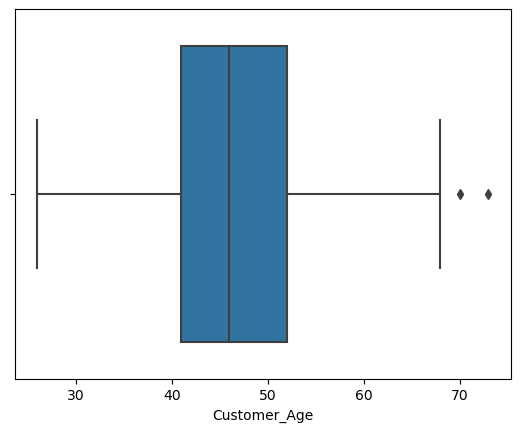

In [13]:
sns.boxplot(x=data['Customer_Age'])
plt.show()

In [14]:
data['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1], dtype=int64)

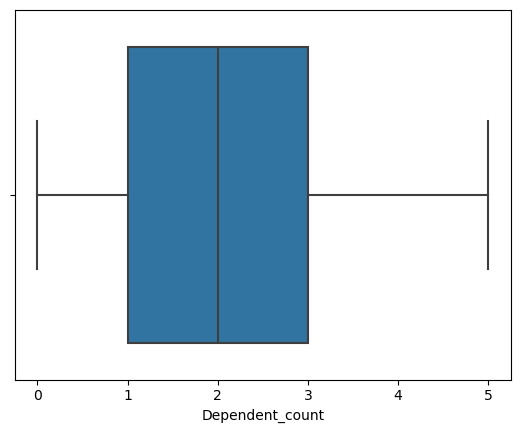

In [15]:
sns.boxplot(x=data['Dependent_count'])
plt.show()

In [16]:
data['Months_on_book'].unique()

array([39., 44., 36., 34., 21., 46., 27., 31., 54., 30., 48., 37., 56.,
       42., 49., 33., 28., 38., 41., 43., 45., 52., 40., 50., nan, 47.,
       35., 32., 20., 29., 25., 53., 24., 55., 23., 22., 26., 13., 51.,
       19., 15., 17., 18., 16., 14.])

In [17]:
mean_Months_on_book = data['Months_on_book'].mean()

In [18]:
mean_Months_on_book

35.91341512469831

In [19]:
data['Months_on_book'] = data['Months_on_book'].fillna(mean_Months_on_book)

In [20]:
data['Months_on_book'].unique()

array([39.        , 44.        , 36.        , 34.        , 21.        ,
       46.        , 27.        , 31.        , 54.        , 30.        ,
       48.        , 37.        , 56.        , 42.        , 49.        ,
       33.        , 28.        , 38.        , 41.        , 43.        ,
       45.        , 52.        , 40.        , 50.        , 35.91341512,
       47.        , 35.        , 32.        , 20.        , 29.        ,
       25.        , 53.        , 24.        , 55.        , 23.        ,
       22.        , 26.        , 13.        , 51.        , 19.        ,
       15.        , 17.        , 18.        , 16.        , 14.        ])

In [21]:
data['Months_on_book']= data['Months_on_book'].round().astype(int)

In [22]:
data['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 47, 35, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14])

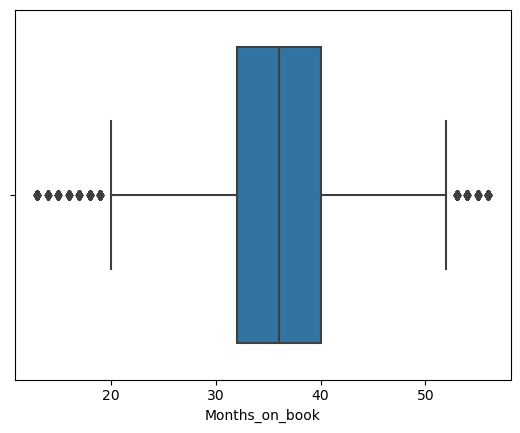

In [23]:
sns.boxplot(x=data['Months_on_book'])
plt.show()

In [24]:
data.loc[data['Months_on_book']<20 , 'Months_on_book']=np.nan

In [25]:
data.loc[data['Months_on_book']>53 , 'Months_on_book']=np.nan

In [26]:
data['Months_on_book'] = data['Months_on_book'].fillna(mean_Months_on_book)

In [27]:
data['Months_on_book']= data['Months_on_book'].round().astype(int)

In [28]:
data['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 30, 48, 37, 42, 49, 33, 28, 38, 41,
       43, 45, 52, 40, 50, 47, 35, 32, 20, 29, 25, 53, 24, 23, 22, 26, 51])

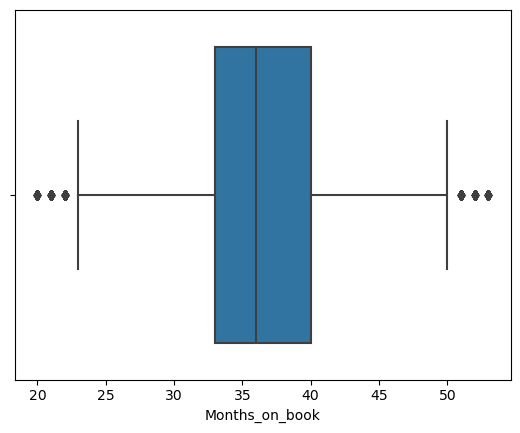

In [29]:
sns.boxplot(x=data['Months_on_book'])
plt.show()

In [30]:
data['Total_Relationship_Count'].unique()

array([ 5.,  6.,  4.,  3.,  2., nan,  1.])

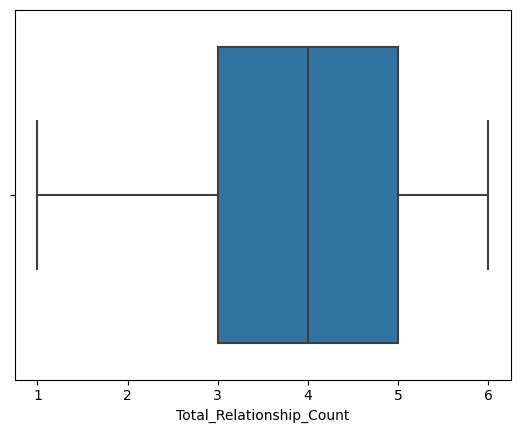

In [31]:
sns.boxplot(x=data['Total_Relationship_Count'])
plt.show()

In [32]:
data.loc[data['Total_Relationship_Count']<2 , 'Total_Relationship_Count']=np.nan

In [33]:
mean_Total_Relationship_Count = data['Total_Relationship_Count'].mean()

In [34]:
data['Total_Relationship_Count'] = data['Total_Relationship_Count'].fillna(mean_Total_Relationship_Count)

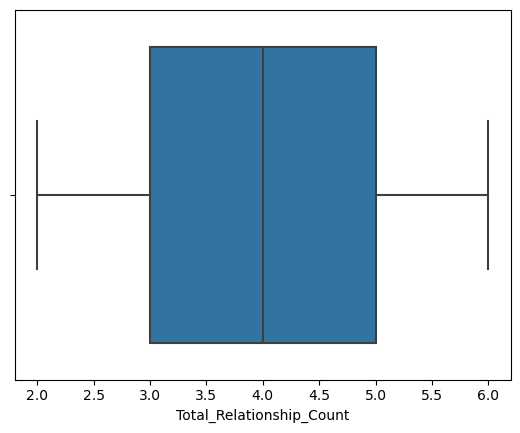

In [35]:
sns.boxplot(x=data['Total_Relationship_Count'])
plt.show()

In [36]:
data['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

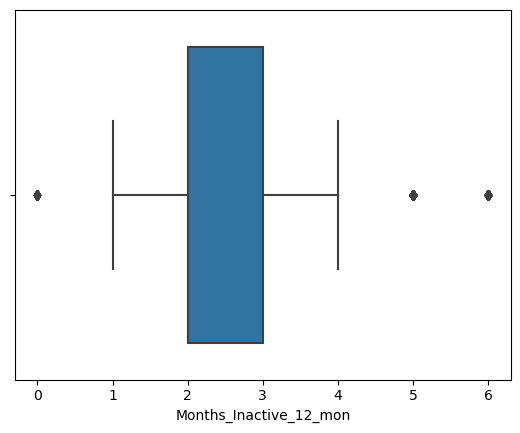

In [37]:
sns.boxplot(x=data['Months_Inactive_12_mon'])
plt.show()

In [38]:
data.loc[data['Months_Inactive_12_mon']>4 , 'Months_Inactive_12_mon']=np.nan

In [39]:
data.loc[data['Months_Inactive_12_mon']<1 , 'Months_Inactive_12_mon']=np.nan

In [40]:
mean_Months_Inactive_12_mon = data['Months_Inactive_12_mon'].mean()

In [41]:
mean_Months_Inactive_12_mon

2.2538891713268936

In [42]:
data['Months_Inactive_12_mon'] = data['Months_Inactive_12_mon'].fillna(mean_Months_Inactive_12_mon)

In [43]:
data['Months_Inactive_12_mon'].unique()

array([1.        , 4.        , 2.        , 3.        , 2.25388917])

In [44]:
data['Months_Inactive_12_mon']= data['Months_Inactive_12_mon'].round().astype(int)

In [45]:
data['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3])

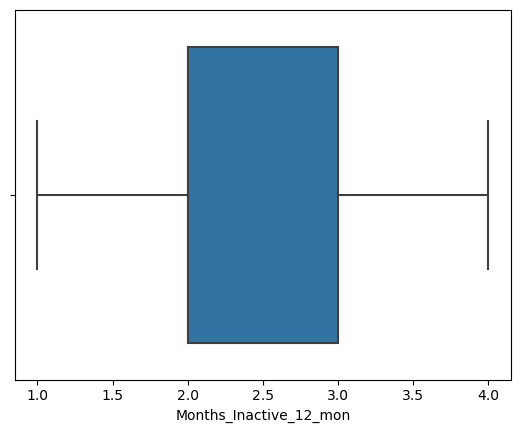

In [46]:
sns.boxplot(x=data['Months_Inactive_12_mon'])
plt.show()

In [47]:
data['Contacts_Count_12_mon'].unique()

array([3, 2, 0, 1, 4, 5, 6], dtype=int64)

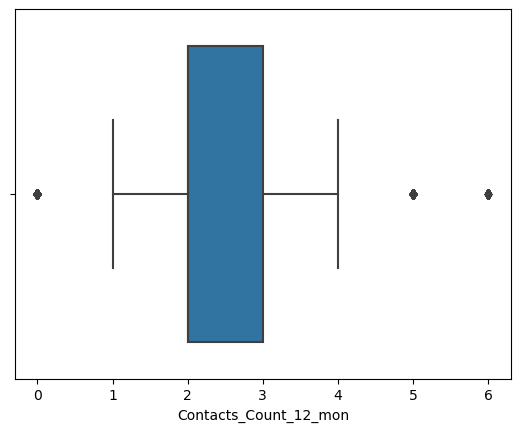

In [48]:
sns.boxplot(x=data['Contacts_Count_12_mon'])
plt.show()

In [49]:
data.loc[data['Contacts_Count_12_mon']>4 , 'Contacts_Count_12_mon']=np.nan

In [50]:
data.loc[data['Contacts_Count_12_mon']<1 , 'Contacts_Count_12_mon']=np.nan

In [51]:
mean_Contacts_Count_12_mon = data['Contacts_Count_12_mon'].mean()

In [52]:
mean_Contacts_Count_12_mon

2.491349480968858

In [53]:
data['Contacts_Count_12_mon'] = data['Contacts_Count_12_mon'].fillna(mean_Contacts_Count_12_mon)

In [54]:
data['Contacts_Count_12_mon'].unique()

array([3.        , 2.        , 2.49134948, 1.        , 4.        ])

In [55]:
data['Contacts_Count_12_mon']= data['Contacts_Count_12_mon'].round().astype(int)

In [56]:
data['Contacts_Count_12_mon'].unique()

array([3, 2, 1, 4])

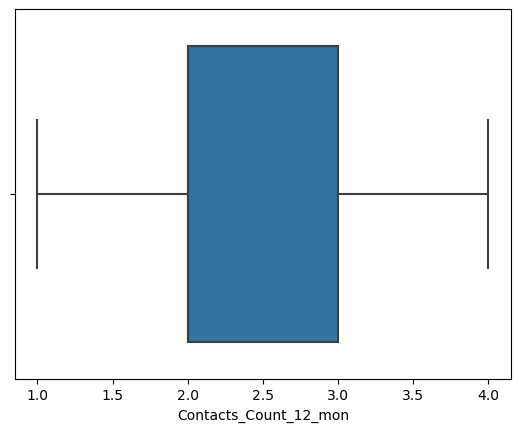

In [57]:
sns.boxplot(x=data['Contacts_Count_12_mon'])
plt.show()

In [58]:
data['Total_Revolving_Bal'].unique()

array([ 777,  864,    0, ...,  534,  476, 2241], dtype=int64)

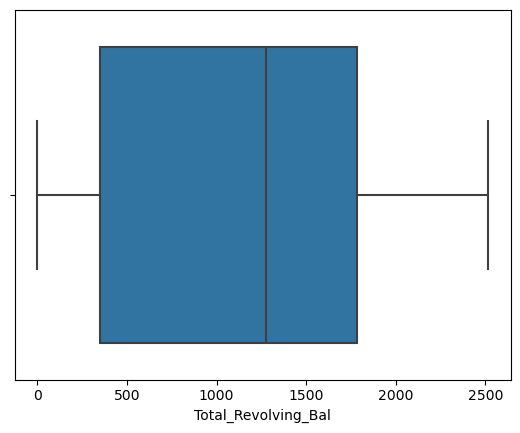

In [59]:
sns.boxplot(x=data['Total_Revolving_Bal'])
plt.show()

In [60]:
data.loc[data['Total_Revolving_Bal']>2200 , 'Total_Revolving_Bal']=np.nan

In [61]:
mean_Total_Revolving_Bal = data['Total_Revolving_Bal'].mean()

In [62]:
data['Total_Revolving_Bal'] = data['Total_Revolving_Bal'].fillna(mean_Total_Revolving_Bal)

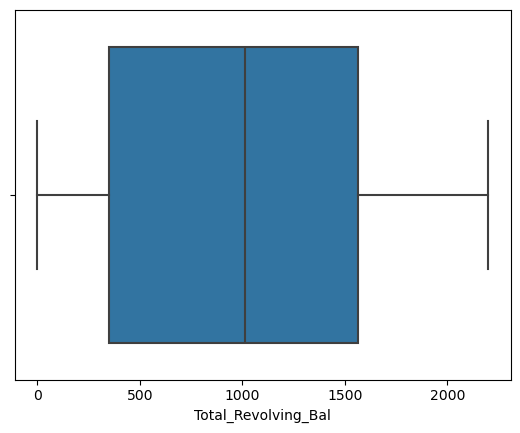

In [63]:
sns.boxplot(x=data['Total_Revolving_Bal'])
plt.show()

In [64]:
data['Total_Amt_Chng_Q4_Q1'].unique()

array([1.335, 1.541, 2.594, ..., 0.222, 0.204, 0.166])

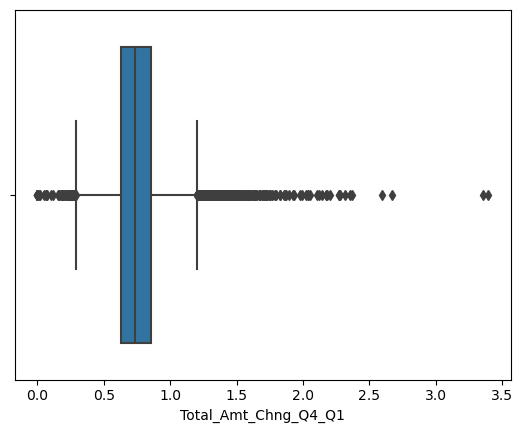

In [65]:
sns.boxplot(x=data['Total_Amt_Chng_Q4_Q1'])
plt.show()

In [66]:
data.loc[data['Total_Amt_Chng_Q4_Q1']>1.25 , 'Total_Amt_Chng_Q4_Q1']=np.nan

In [67]:
data.loc[data['Total_Amt_Chng_Q4_Q1']<0.25 , 'Total_Amt_Chng_Q4_Q1']=np.nan

In [68]:
mean_Total_Amt_Chng_Q4_Q1 = data['Total_Amt_Chng_Q4_Q1'].mean()

In [69]:
mean_Total_Amt_Chng_Q4_Q1

0.7397168123602359

In [70]:
data['Total_Amt_Chng_Q4_Q1'] = data['Total_Amt_Chng_Q4_Q1'].fillna(mean_Total_Amt_Chng_Q4_Q1)

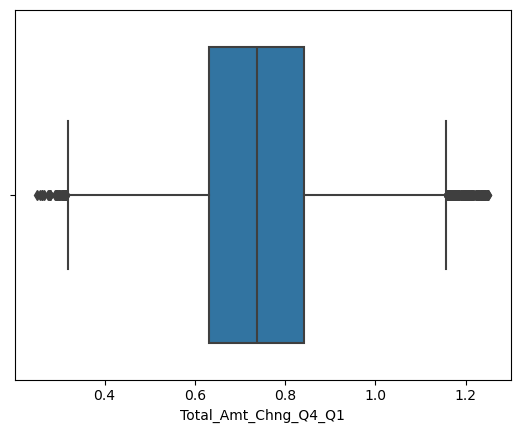

In [71]:
sns.boxplot(x=data['Total_Amt_Chng_Q4_Q1'])
plt.show()

In [72]:
data['Total_Trans_Amt'].unique()

array([ 1144,  1291,  1887, ..., 10291,  8395, 10294], dtype=int64)

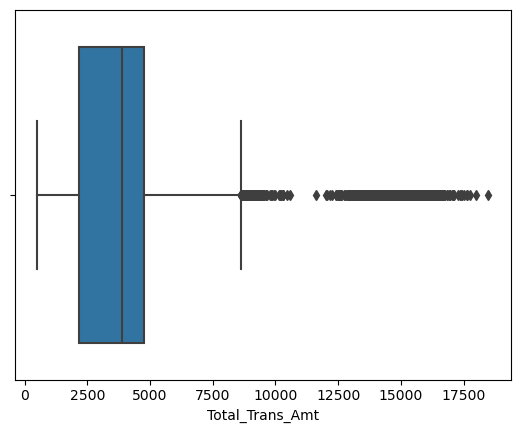

In [73]:
sns.boxplot(x=data['Total_Trans_Amt'])
plt.show()

In [74]:
data.loc[data['Total_Trans_Amt']>6000 , 'Total_Trans_Amt']=np.nan

In [75]:
mean_Total_Trans_Amt = data['Total_Trans_Amt'].mean()

In [76]:
data['Total_Trans_Amt'] = data['Total_Trans_Amt'].fillna(mean_Total_Trans_Amt)

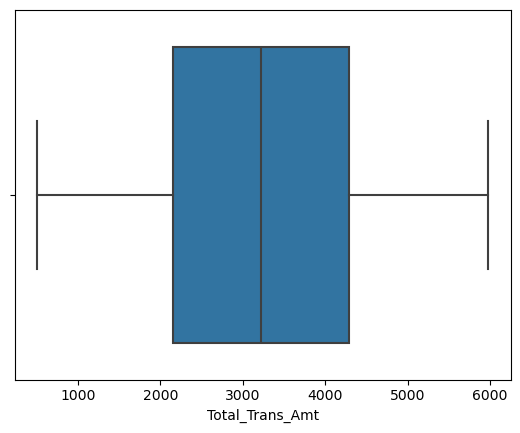

In [77]:
sns.boxplot(x=data['Total_Trans_Amt'])
plt.show()

In [78]:
data['Total_Trans_Ct'].unique()

array([ 42,  33,  20,  28,  24,  31,  36,  32,  26,  17,  29,  27,  21,
        30,  16,  18,  23,  22,  40,  38,  25,  43,  37,  19,  35,  15,
        41,  57,  12,  14,  34,  44,  13,  47,  10,  39,  53,  50,  52,
        48,  49,  45,  11,  55,  46,  54,  60,  51,  63,  58,  59,  61,
        78,  64,  65,  62,  67,  66,  56,  69,  71,  75,  74,  76,  84,
        82,  88,  68,  70,  73,  86,  72,  79,  80,  85,  81,  87,  83,
        91,  89,  77, 103,  93,  96,  99,  92,  90,  94,  95,  98, 100,
       102,  97, 101, 104, 105, 106, 107, 109, 118, 108, 122, 113, 112,
       111, 127, 114, 124, 110, 120, 125, 121, 117, 126, 134, 116, 119,
       129, 131, 115, 128, 139, 123, 130, 138, 132], dtype=int64)

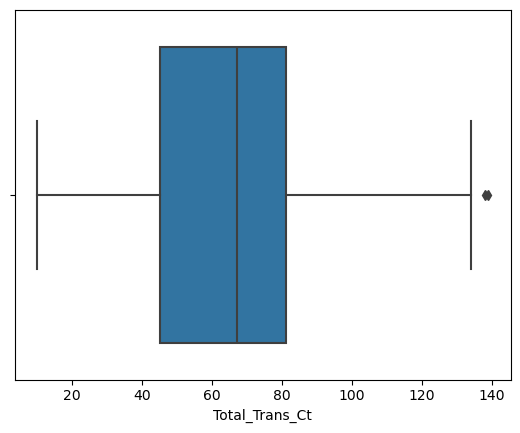

In [79]:
sns.boxplot(x=data['Total_Trans_Ct'])
plt.show()

In [80]:
data['Total_Ct_Chng_Q4_Q1'].unique()

array([1.625, 3.714, 2.333, 2.5  , 0.846, 0.722, 0.714, 1.182, 0.882,
       0.68 , 1.364, 3.25 , 2.   , 0.611, 1.7  , 0.929, 1.143, 0.909,
       0.6  , 1.571, 0.353, 0.75 , 0.833, 1.3  , 1.   , 0.9  , 2.571,
       1.6  , 1.667, 0.483, 1.176, 1.2  , 0.556, 0.143, 0.474, 0.917,
       1.333, 0.588, 0.8  , 1.923, 0.25 , 0.364, 1.417, 1.083, 1.25 ,
       0.5  , 1.154, 0.733, 0.667, 2.4  , 1.05 , 0.286, 0.4  , 0.522,
       0.435, 1.875, 0.966, 1.412, 0.526, 0.818, 1.8  , 1.636, 2.182,
       0.619, 0.933, 1.222, 0.304, 0.727, 0.385, 1.5  , 0.789, 0.542,
       1.1  , 1.095, 0.824, 0.391, 0.346, 3.   , 1.056, 1.118, 0.786,
       0.625, 1.533, 0.382, 0.355, 0.765, 0.778, 2.2  , 1.545, 0.7  ,
       1.211, 1.231, 0.636, 0.455, 2.875, 1.308, 0.467, 1.909, 0.571,
       0.812, 2.429, 0.706, 2.167, 0.263, 0.429, 2.286, 0.828, 1.467,
       0.478, 0.867, 0.88 , 1.444, 1.273, 0.941, 0.684, 0.591, 0.762,
       0.529, 0.615, 0.519, 0.421, 0.947, 1.167, 1.105, 0.737, 1.263,
       0.538, 1.071,

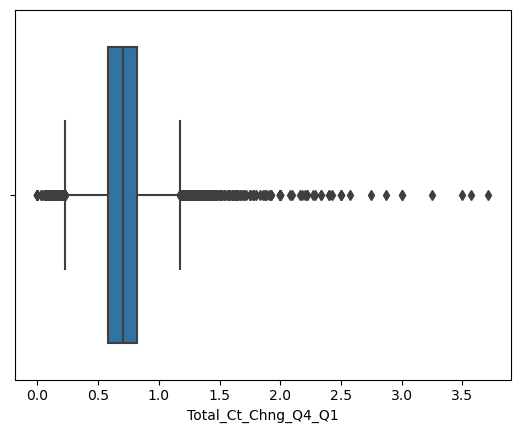

In [81]:
sns.boxplot(x=data['Total_Ct_Chng_Q4_Q1'])
plt.show()

In [82]:
data.loc[data['Total_Ct_Chng_Q4_Q1']>1.25 , 'Total_Ct_Chng_Q4_Q1']=np.nan

In [83]:
data.loc[data['Total_Ct_Chng_Q4_Q1']<0.2 , 'Total_Ct_Chng_Q4_Q1']=np.nan

In [84]:
mean_Total_Ct_Chng_Q4_Q1 = data['Total_Ct_Chng_Q4_Q1'].mean()

In [85]:
mean_Total_Ct_Chng_Q4_Q1

0.6968052184466019

In [86]:
data['Total_Ct_Chng_Q4_Q1'] = data['Total_Ct_Chng_Q4_Q1'].fillna(mean_Total_Ct_Chng_Q4_Q1)

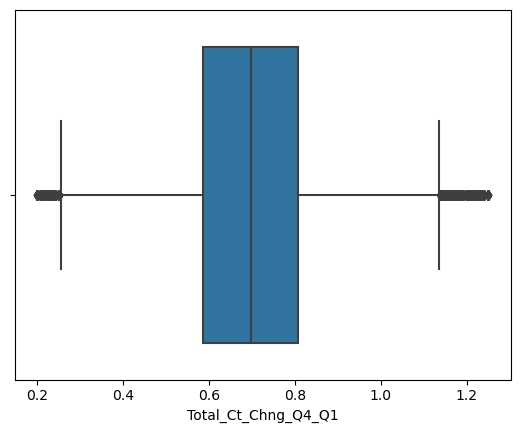

In [87]:
sns.boxplot(x=data['Total_Ct_Chng_Q4_Q1'])
plt.show()

In [88]:
data['Avg_Utilization_Ratio'].unique()

array([0.061, 0.105, 0.   , 0.76 , 0.311, 0.066, 0.048, 0.113, 0.144,
       0.217, 0.174, 0.195, 0.279, 0.23 , 0.078, 0.095, 0.788, 0.08 ,
       0.086, 0.152, 0.626, 0.215, 0.093, 0.099, 0.285, 0.658, 0.69 ,
       0.282, 0.562, 0.135, 0.544, 0.757, 0.241, 0.077, 0.018, 0.355,
       0.145, 0.209, 0.793, 0.074, 0.259, 0.591, 0.687, 0.127, 0.667,
       0.843, 0.422, 0.156, 0.525, 0.587, 0.211, 0.088, 0.111, 0.044,
       0.276, 0.704, 0.656, 0.053, 0.051, 0.467, 0.698, 0.067, 0.079,
       0.287, 0.36 , 0.256, 0.719, 0.198, 0.14 , 0.035, 0.619, 0.108,
       0.062, 0.765, 0.963, 0.524, 0.347, 0.45 , 0.232, 0.299, 0.085,
       0.059, 0.43 , 0.62 , 0.027, 0.169, 0.058, 0.223, 0.057, 0.513,
       0.473, 0.047, 0.106, 0.05 , 0.03 , 0.615, 0.15 , 0.407, 0.191,
       0.096, 0.176, 0.83 , 0.412, 0.678, 0.246, 0.271, 0.114, 0.395,
       0.406, 0.258, 0.178, 0.941, 0.141, 0.118, 0.119, 0.64 , 0.432,
       0.612, 0.359, 0.309, 0.101, 0.607, 0.512, 0.806, 0.463, 0.77 ,
       0.076, 0.133,

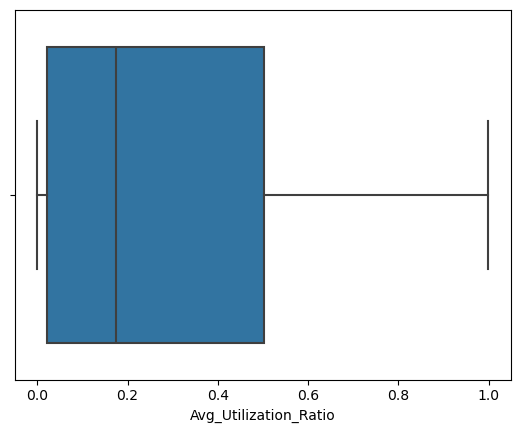

In [89]:
sns.boxplot(x=data['Avg_Utilization_Ratio'])
plt.show()

In [90]:
data.loc[data['Avg_Utilization_Ratio']>0.6, 'Avg_Utilization_Ratio']=np.nan

In [91]:
mean_Avg_Utilization_Ratio = data['Avg_Utilization_Ratio'].mean()

In [92]:
mean_Avg_Utilization_Ratio

0.1746641550053821

In [93]:
data['Avg_Utilization_Ratio'] = data['Avg_Utilization_Ratio'].fillna(mean_Avg_Utilization_Ratio)

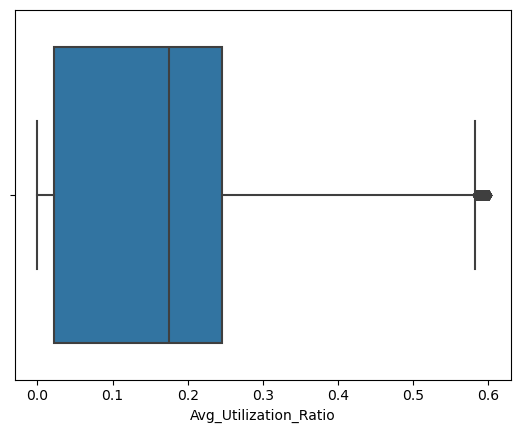

In [94]:
sns.boxplot(x=data['Avg_Utilization_Ratio'])
plt.show()

In [95]:
data['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [96]:
mode_Gender = data['Gender'].mode()[0]

In [97]:
data['Gender'] = data['Gender'].fillna(mode_Gender)

In [98]:
data['Gender_numeric'] = data['Gender'].map({'M':1,'F':0})

In [99]:
data['Gender_numeric'].unique()

array([1, 0], dtype=int64)

In [100]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [101]:
Education_order = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5,'Unknown':np.nan}

In [102]:
data['Education_Level_encoded']=data['Education_Level'].map(Education_order)

In [103]:
data['Education_Level_encoded'].unique()

array([ 1.,  3.,  0., nan,  2.,  4.,  5.])

In [104]:
data['Marital_Status'].unique()

array(['Married', nan, 'Unknown', 'Single', 'Divorced'], dtype=object)

In [105]:
data['Marital_Status_encoded'] = data['Marital_Status'].map({'Married':1,'Single':0,'Divorced':2,'Unknown':np.nan})

In [106]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [107]:
income_order = { 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3,'$80K - $120K': 4,  '$120K +': 5,'Unknown':np.nan}

In [108]:
data['Income_Category_encoded'] = data['Income_Category'].map(income_order)

In [109]:
data['Card_Category'].unique()

array(['Blue', nan, 'Gold', 'Silver', 'Platinum'], dtype=object)

In [110]:
card_order = {  'Blue': 1,  'Silver': 2,   'Gold': 3,   'Platinum': 4}

In [111]:
data['Card_Category_encoded'] = data['Card_Category'].map(card_order)

In [112]:
target_cols = ['Education_Level_encoded', 'Income_Category_encoded','Card_Category_encoded','Marital_Status_encoded']

In [113]:
feature_cols = [ 'Total_Trans_Amt','Customer_Age', 'Dependent_count','Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Months_Inactive_12_mon']

In [114]:
knn_cols = target_cols + feature_cols

In [115]:
imputer = KNNImputer(n_neighbors=5)

In [116]:
data[knn_cols] = imputer.fit_transform(data[knn_cols])

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Gender                    10167 non-null  object 
 2   Dependent_count           10167 non-null  float64
 3   Education_Level           10167 non-null  object 
 4   Marital_Status            8217 non-null   object 
 5   Income_Category           10167 non-null  object 
 6   Card_Category             8243 non-null   object 
 7   Months_on_book            10167 non-null  int32  
 8   Total_Relationship_Count  10167 non-null  float64
 9   Months_Inactive_12_mon    10167 non-null  float64
 10  Contacts_Count_12_mon     10167 non-null  int32  
 11  Credit_Limit              10167 non-null  float64
 12  Total_Revolving_Bal       10167 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 14  Total_

In [118]:
numerical_cols=['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
    'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [119]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [120]:
X = data.drop(columns=['Credit_Limit','Education_Level','Gender','Marital_Status','Income_Category','Card_Category'])

In [121]:
y = data['Credit_Limit']

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
mlp = 



(hidden_layer_sizes=(64,32,12),activation='relu',solver='adam', max_iter=700,random_state=42)

In [124]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32, 12, 8), max_iter=700, random_state=42)

In [125]:
y_pred = mlp.predict(X_test)

In [126]:
r2 = r2_score(y_test, y_pred)

In [127]:
r2

0.8180692872651341

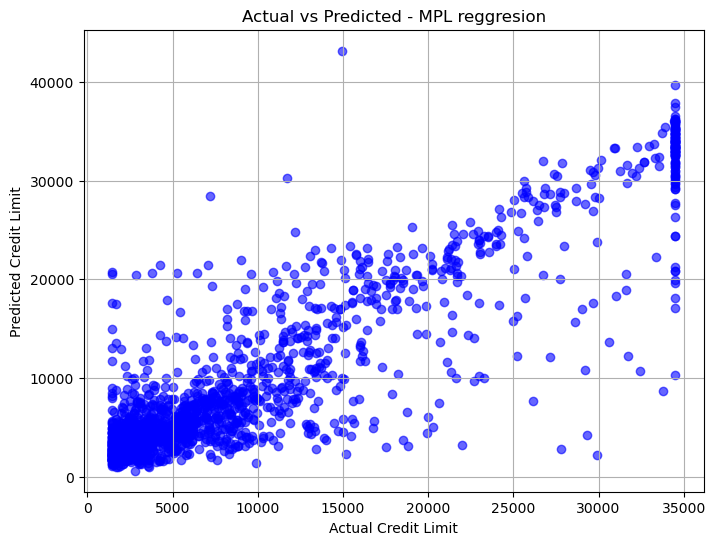

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Credit Limit")
plt.ylabel("Predicted Credit Limit")
plt.title("Actual vs Predicted - MPL reggresion")
plt.grid(True)
plt.show()

In [129]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.873822
Test set score: 0.818069
